In [ ]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv("college_student_placement_dataset.csv")
df.head()


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [ ]:
df.describe()


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


In [ ]:
df.isnull().sum() #Missing Value Check


College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

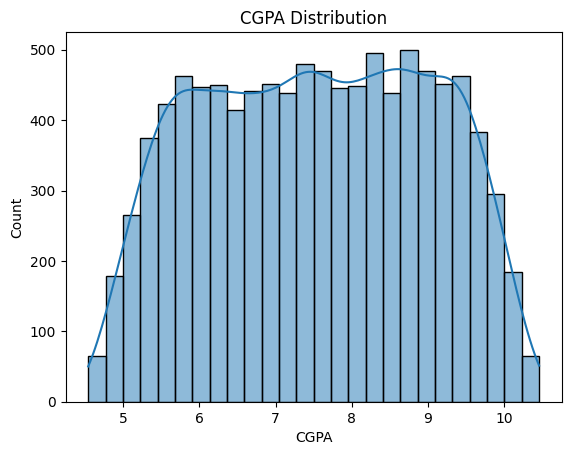

In [ ]:
sns.histplot(df['CGPA'], kde=True)
plt.title("CGPA Distribution")
plt.show()

<Axes: xlabel='CGPA', ylabel='Count'>

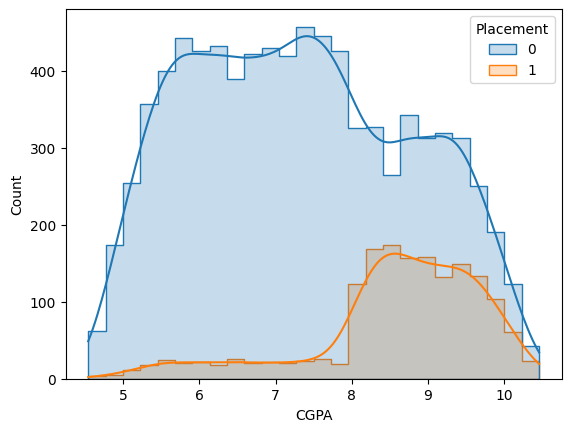

In [ ]:
sns.histplot(data=df, x='CGPA', hue='Placement', kde=True, element='step')

#Observations from the CGPA vs Placement Distribution
->CGPA values lie approximately between 4.5 and 10.2.<br>
->Most students fall in the 6.0 – 9.5 CGPA range.<br>
✅Placement = 1 (Placed Students)<br>
    ->Placed students are highly concentrated between CGPA 8.0 and 10.0.<br>
    ->The KDE curve peaks around 8.8 – 9.2, indicating this is the most common CGPA range for placed students.<br>
    ->Very few placed students have CGPA below 7.0.<br>
✅Placement = 0 (Not Placed Students)<br>
    ->Not placed students are spread across almost the entire CGPA range.<br>
    ->Higher density is observed between 5.5 and 8.0 CGPA.<br>
    ->Even students with high CGPA (above 8.5) exist in the non-placed category, but with lower density compared to placed students.<br>

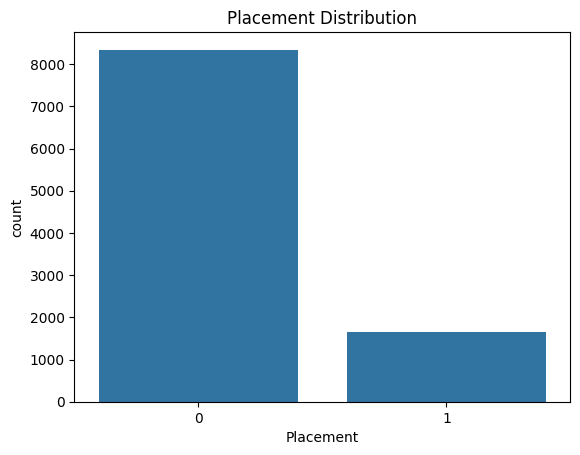

In [ ]:
sns.countplot(x='Placement', data=df)
plt.title("Placement Distribution")
plt.show()


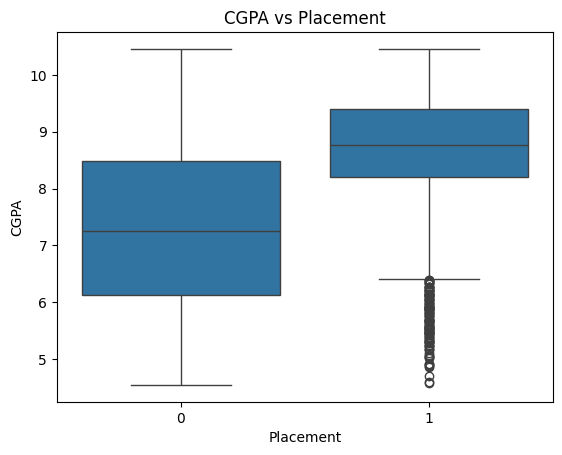

In [ ]:
sns.boxplot(x='Placement', y='CGPA', data=df)
plt.title("CGPA vs Placement")
plt.show()


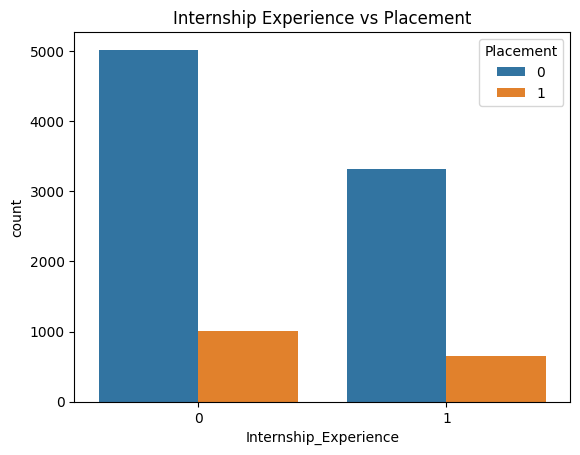

In [ ]:
sns.countplot(x='Internship_Experience', hue='Placement', data=df)
plt.title("Internship Experience vs Placement")
plt.show()


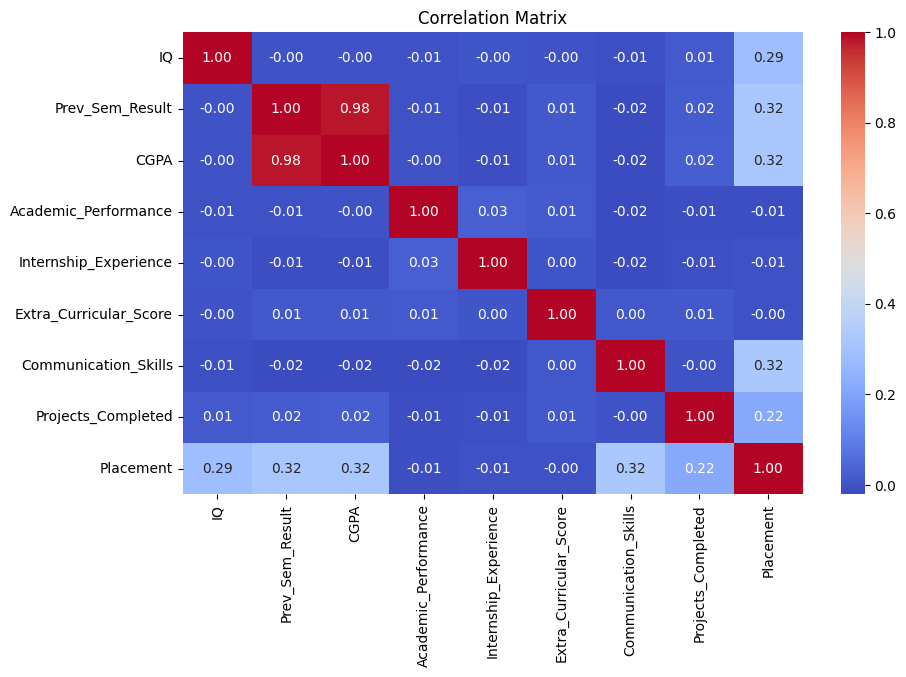

In [ ]:
plt.figure(figsize=(10,6))
df1 = df.select_dtypes(include='number')
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


#Key Observations Of this Heatmap
->CGPA and Previous Semester Result show a very strong positive correlation (~0.98).<br>
->This indicates that students who performed well in previous semesters tend to maintain a high CGPA.<br>